In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps
import cv2
import io
import os
import numpy as np
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/Shared drives/CV/Images'
%cd $path
%pwd

/content/drive/Shared drives/CV/Images


'/content/drive/Shared drives/CV/Images'

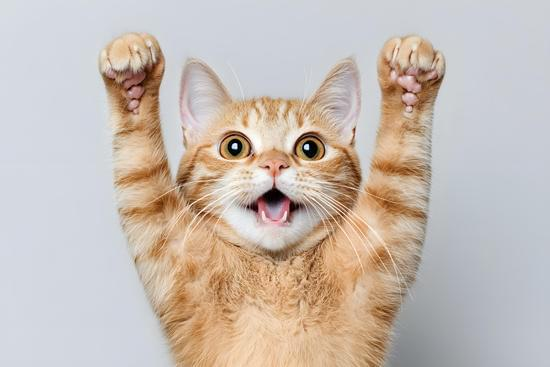

In [ ]:
img_check = cv2.imread('cat.jpeg')
cv2_imshow(img_check.astype(np.uint8))

In [ ]:
# Down/Up Sampling
# cv2.resize(image, dim, interpolation = _)

def sample(rounds, img):
    interpolation = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC,
                     cv2.INTER_AREA, cv2.INTER_LANCZOS4, cv2.INTER_LINEAR_EXACT,
                     cv2.INTER_NEAREST_EXACT]
    scale = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

    img_back = img.copy()
    for _ in range(2 ** rounds):
      scale_random = random.randint(0, len(scale) - 1)

      img_small = cv2.resize(img_back, dsize = None, fx = scale[scale_random], fy = scale[scale_random],
                             interpolation = interpolation[random.randint(0, len(interpolation) - 1)])
      img_back = cv2.resize(img_small, dsize = None, fx = 1 / scale[scale_random], fy = 1 / scale[scale_random],
                            interpolation = interpolation[random.randint(0, len(interpolation) - 1)])
    return img_back



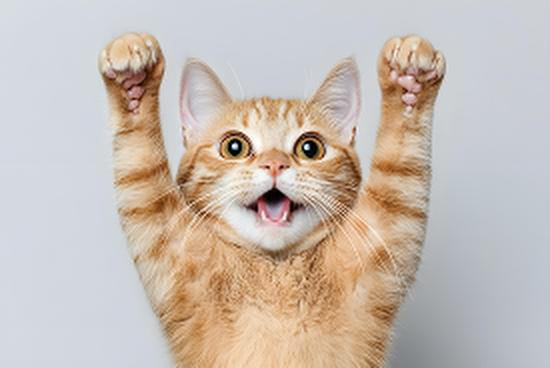

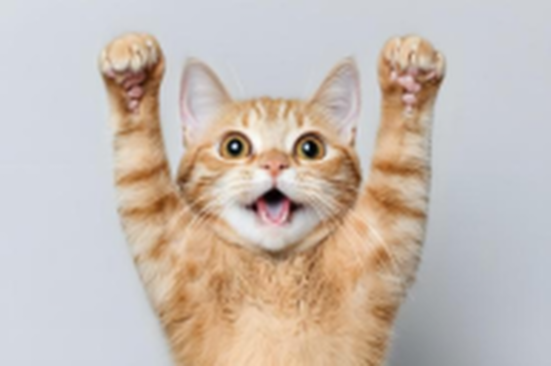

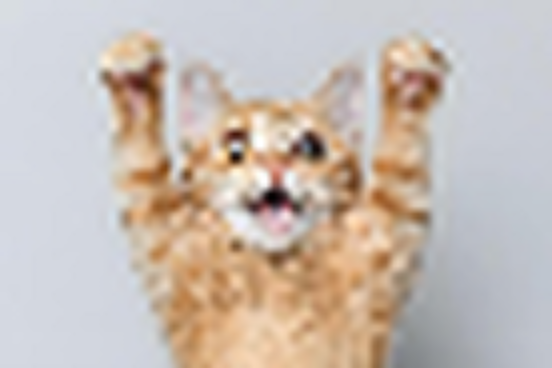

In [ ]:
img_check = cv2.imread('cat.jpeg')

for i in range(3):
  img_sampled = sample(i, img_check)
  cv2_imshow(img_sampled.astype(np.uint8))

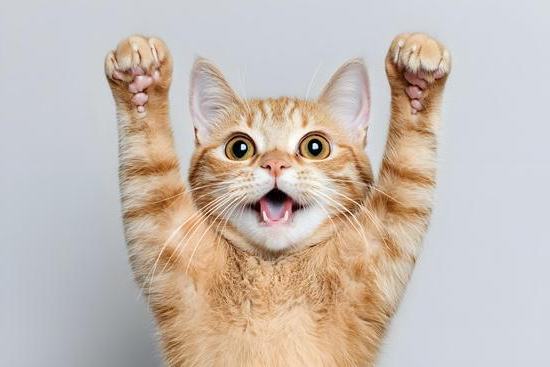

In [ ]:
img = Image.open('cat.jpeg')

color_change = random.randint(0, 3)
flipper = random.randint(0, 2)

match color_change:
  case 0:
    img = ImageOps.invert(img)
  case 1:
    img = ImageOps.autocontrast(img)
  case 2:
    img = ImageOps.equalize(img)
  case 3:
    img = ImageOps.grayscale(img)


match flipper:
  case 0:
    img = ImageOps.flip(img)
  case 1:
    img = ImageOps.mirror(img)
  case 2:
    img = ImageOps.flip(img)
    img = ImageOps.mirror(img)

img = img.convert("RGB")
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

cv2_imshow(img.astype(np.uint8))


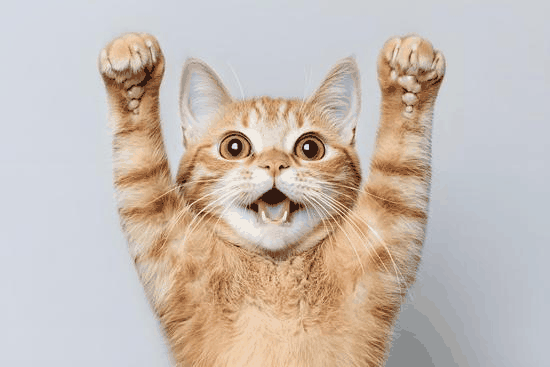

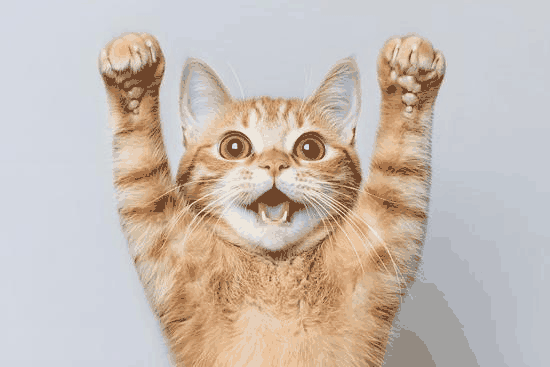

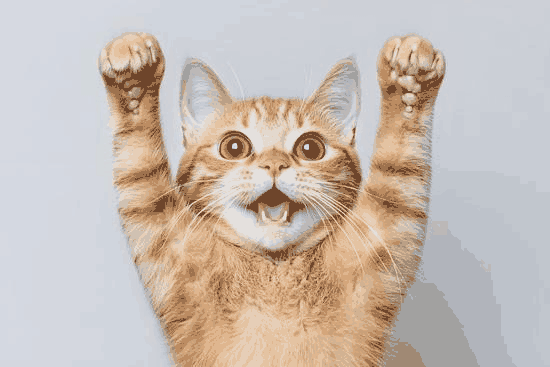

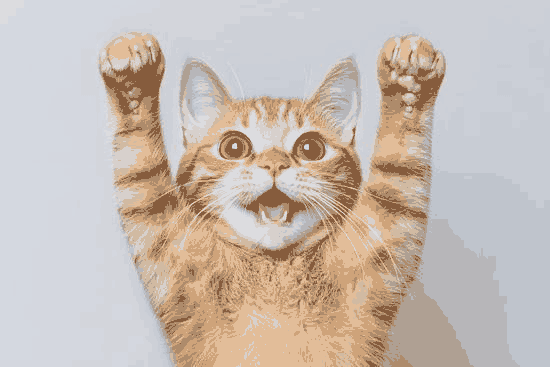

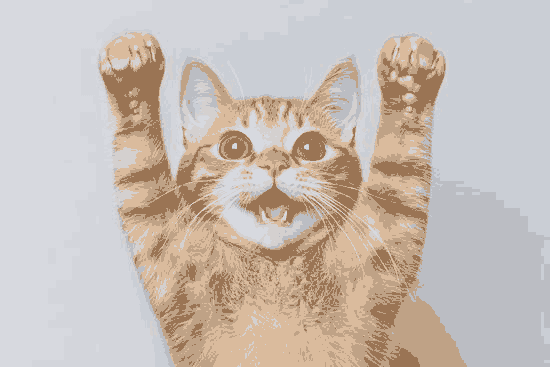

In [ ]:
img = Image.open('cat.jpeg')

for i in range(5):
  quant_img = img.copy()
  quant_img = img.quantize(colors = 256 // (2 ** (i + 1)), method=Image.MEDIANCUT, dither=Image.FLOYDSTEINBERG)

  rgb_quant_img = quant_img.convert("RGB")
  arr_quant_img = np.array(rgb_quant_img)
  cv2_quant_img = cv2.cvtColor(arr_quant_img, cv2.COLOR_RGB2BGR)
  cv2_imshow(cv2_quant_img.astype(np.uint8))

In [ ]:
def compression(rounds, img):
  if img.mode != 'RGB':
        img = img.convert('RGB')

  img.save("temp.jpeg", "JPEG")

  for _ in range(2 ** rounds):
    format = random.randint(0, 3)

    with Image.open("temp.jpeg") as img:
      match format:
        case 0:
          temp_file = ("temp.bmp")
        case 1:
          temp_file = ("temp.tiff")
        case 2:
          temp_file = ("temp.webp")
        case 3:
          temp_file = ("temp.png")

      img.save(temp_file)

      with Image.open(temp_file) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')

            img.save("temp.jpeg")

  return Image.open("temp.jpeg")


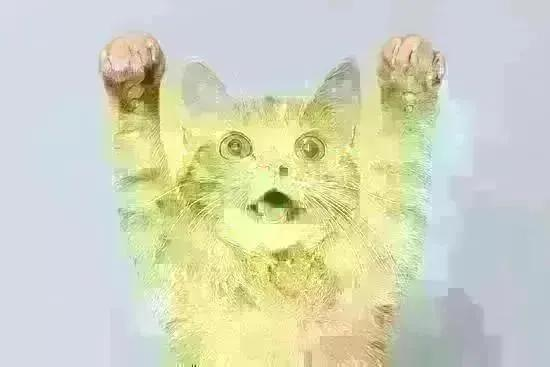

In [ ]:
img = Image.open('cat.jpeg')
compressed = compression(11, img)

rgb_compressed = compressed.convert("RGB")
arr_compressed = np.array(rgb_compressed)
cv2_compressed = cv2.cvtColor(arr_compressed, cv2.COLOR_RGB2BGR)
cv2_imshow(cv2_compressed.astype(np.uint8))